<a href="https://colab.research.google.com/github/jazila-begum/redactify/blob/main/redactify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
path = kagglehub.dataset_download("nagendra048/aadhar-dataset")
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/aadhar-dataset


In [12]:
!pip install qrdet

In [2]:
!pip install ultralyticsplus

  Using cached ultralytics-8.0.239-py3-none-any.whl.metadata (39 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached ultralytics-8.0.239-py3-none-any.whl (699 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.165
    Uninstalling ultralytics-8.3.165:
      Successfully uninstalled ultralytics-8.3.165


In [3]:
import os

# Set the dataset directory to the kagglehub downloaded path
DATASET_DIR = '/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1'

# Walk through the directory and print all files
for root, dirs, files in os.walk(DATASET_DIR):
    print(f"\nIn directory: {root}")
    for file in files:
        print(os.path.join(root, file))

# Initialize lists to hold image paths for train, val, and test sets
train_images = []
val_images = []
test_images = []

# Collect image files based on directory names and extensions
for root, dirs, files in os.walk(DATASET_DIR):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            # Check if 'train', 'val', or 'test' is in the folder path
            lower_root = root.lower()
            full_path = os.path.join(root, file)
            if 'train' in lower_root:
                train_images.append(full_path)
            elif 'val' in lower_root or 'valid' in lower_root:
                val_images.append(full_path)
            elif 'test' in lower_root:
                test_images.append(full_path)

print(f"\nNumber of train images: {len(train_images)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

# Print sample file paths from each set
print("\nSample train image:", train_images[0] if train_images else "None found")
print("Sample val image:", val_images[0] if val_images else "None found")
print("Sample test image:", test_images[0] if test_images else "None found")



In directory: /root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1
/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/README.dataset.txt
/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/README.roboflow.txt
/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/data.yaml

In directory: /root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/train

In directory: /root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/train/labels
/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/train/labels/DE8svj0U0AAEnrD_jpg.rf.7de343903e8549d1080aec5ec6293fd3.txt
/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/train/labels/c69b7f40144bf1cd4051251754af93ed_jpg.rf.00eee9c15dac932ff0c9e10b96492588.txt
/root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/train/labels/086d820550f34066764f4047ddc263ca_jpg.rf.e13dda013a3f625eed005d88c9fc2088.txt
/roo

In [4]:
# 2. Install dependencies
!pip install -U ultralytics pytesseract opencv-python matplotlib

  Using cached ultralytics-8.3.165-py3-none-any.whl.metadata (37 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
Using cached ultralytics-8.3.165-py3-none-any.whl (1.0 MB)
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.239
    Uninstalling ultralytics-8.0.239:
      Successfully uninstalled ultralytics-8.0.239
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sahi 0.11.30 requires opencv-python<=4.11.0.86, but you have opencv-python 4.12.0.88 which is incompatible.
ul

In [5]:
# 3. Import libraries
import cv2
import numpy as np
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

In [6]:
# 4. Set up paths
# Update these paths to match your dataset structure in Colab
IMAGE_PATH = val_images[0] if val_images else None # Use the first image from the validated images list

# Check if an image path was found
if IMAGE_PATH:
  print(f"Using image: {IMAGE_PATH}")
else:
  print("No validation images found in the dataset.")

Using image: /root/.cache/kagglehub/datasets/nagendra048/aadhar-dataset/versions/1/valid/images/447675edf75967ed3047d0ff28f280ac-1-_jpg.rf.65b78e1997fcd794716a02780a4b5778.jpg


In [7]:
# 5. Load YOLOv8 pretrained model (nano variant for speed)
model = YOLO('yolov8n.pt')  # Uses pretrained COCO weights

In [8]:
id2label = {
    0: "AADHAR_NUMBER",
    1: "DATE_OF_BIRTH",
    2: "GENDER",
    3: "NAME",
    4: "ADDRESS"
}

In [9]:
# 7. Helper function to mask regions
def mask_region(image, x1, y1, x2, y2):
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), -1)
    return image

In [10]:
# 8. Inference and masking
if IMAGE_PATH and os.path.exists(IMAGE_PATH):
    image = cv2.imread(IMAGE_PATH)
    if image is not None:
        orig_image = image.copy()
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Run YOLOv8 detection
        results = model.predict(source=image_rgb, conf=0.5)[0]

        # Mask photo region (class 0 in COCO)
        for box, cls_id in zip(results.boxes.xyxy, results.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            label = id2label.get(int(cls_id), None)
            if label == "PHOTO":
                image = mask_region(image, x1, y1, x2, y2)
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    else:
        print(f"Error loading image from {IMAGE_PATH}")
else:
    print(f"Image path not found or is invalid: {IMAGE_PATH}")


0: 640x640 (no detections), 9.7ms
Speed: 5.5ms preprocess, 9.7ms inference, 60.2ms postprocess per image at shape (1, 3, 640, 640)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pt:   0%|          | 0.00/6.26M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/qrdet/qrdet.py:129: UserWarning: QRDetector has been updated to use the new YoloV8 model. Use legacy=True when calling detect for backwards compatibility with 1.x versions. Or update to new output (new output is a tuple of dicts, containing several new information (1.x output is accessible through 'bbox_xyxy' and 'confidence').Forget this message if you are reading it from QReader. [This is a first download warning and will be removed at 2.1]
  warn("QRDetector has been updated to use the new YoloV8 model. Use legacy=True when calling detect "



0: 640x640 1 AADHAR_NUMBER, 1 DATE_OF_BIRTH, 1 GENDER, 1 NAME, 21.7ms
Speed: 3.5ms preprocess, 21.7ms inference, 342.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 11.4ms
Speed: 5.6ms preprocess, 11.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


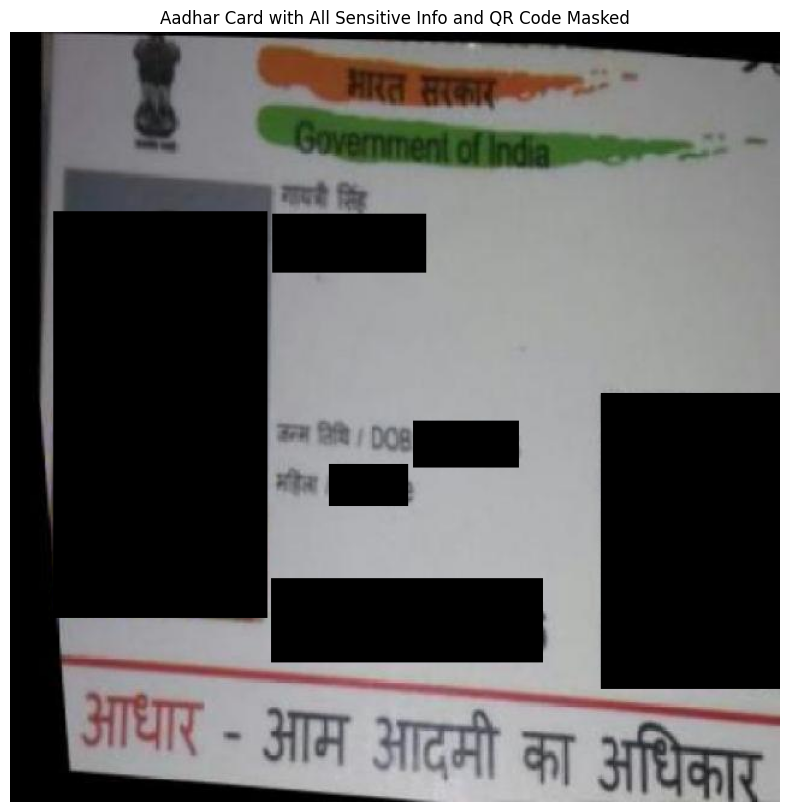

In [13]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
from huggingface_hub import hf_hub_download
from qrdet import QRDetector  # QR code detector

# Download and load the fine-tuned Aadhar card YOLOv8 model
repo_config = dict(
    repo_id="arnabdhar/YOLOv8-nano-aadhar-card",
    filename="model.pt",
    local_dir="./models"
)
model_path = hf_hub_download(**repo_config)  # Download the model

# Load fine-tuned Aadhar fields model
aadhar_model = YOLO(model_path)  # Use the downloaded model path

# Load pretrained COCO model for photo detection
coco_model = YOLO('yolov8n.pt')  # pretrained on COCO, class 0 = person

# Initialize QR code detector (QRDet)
qr_detector = QRDetector(model_size='s')  # you can choose 's', 'm', or 'l'

# Load image
image_path = IMAGE_PATH  # Use the IMAGE_PATH variable from previous cells

# Check if an image path was found and the image can be loaded
if image_path and os.path.exists(image_path):
    image = cv2.imread(image_path)
    image_masked = image.copy() if image is not None else None  # Handle case where image is None

    if image_masked is not None:
        # Run inference on Aadhar fields
        results_fields = aadhar_model.predict(source=image, conf=0.5)[0]

        # Mask detected Aadhar fields
        for box, cls_id in zip(results_fields.boxes.xyxy, results_fields.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)

        # Run inference on COCO model to detect photo (person)
        results_photo = coco_model.predict(source=image, conf=0.5)[0]

        # Mask photo region (class 0 = person)
        for box, cls_id in zip(results_photo.boxes.xyxy, results_photo.boxes.cls):
            if int(cls_id) == 0:  # person class
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)

        # Detect and mask QR codes
        qr_detections = qr_detector.detect(image=image, is_bgr=True)
        for det in qr_detections:
            # Extract and convert bounding box coordinates to integers
            x1, y1, x2, y2 = map(int, det['bbox_xyxy'])
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)

        # Display masked image
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image_masked, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Aadhar Card with All Sensitive Info and QR Code Masked')
        plt.show()
    else:
        print(f"Error loading image from {image_path}")
else:
    print(f"Image path not found or is invalid: {image_path}")


0: 640x640 1 AADHAR_NUMBER, 1 DATE_OF_BIRTH, 1 GENDER, 1 NAME, 8.0ms
Speed: 4.1ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


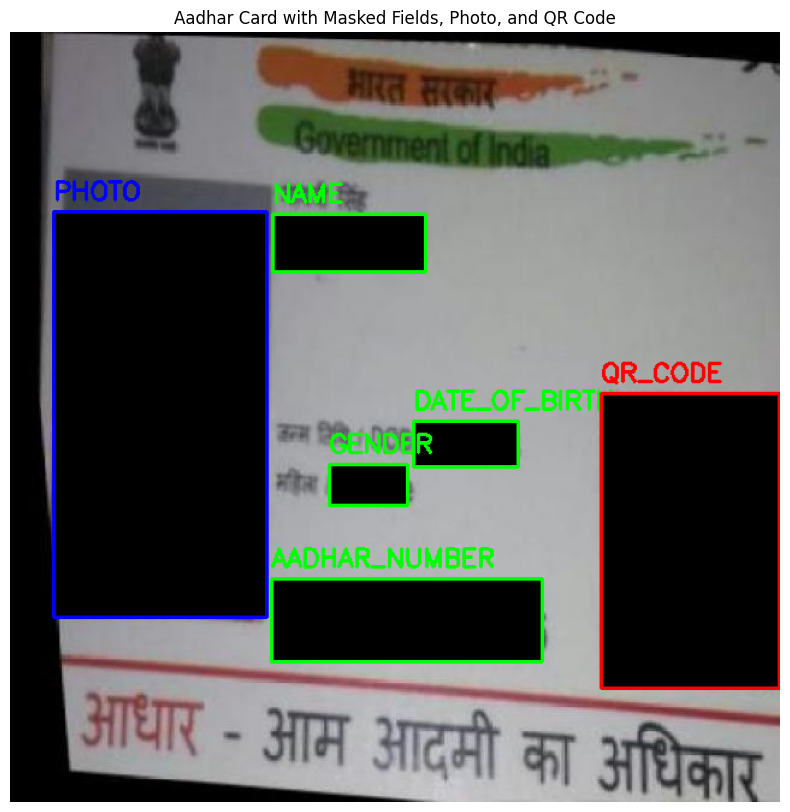

In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
from huggingface_hub import hf_hub_download
from qrdet import QRDetector  # QR code detector (pip install qrdet)

# 1. Download and load the fine-tuned Aadhar card YOLOv8 model
repo_config = dict(
    repo_id="arnabdhar/YOLOv8-nano-aadhar-card",
    filename="model.pt",
    local_dir="./models"
)
model_path = hf_hub_download(**repo_config)  # Download the model

# 2. Load pretrained COCO model for photo detection
coco_model = YOLO('yolov8n.pt')  # class 0 = person

# 3. Initialize QR code detector (QRDet)
qr_detector = QRDetector(model_size='s')  # 's', 'm', or 'l'

# 4. Set your image path
image_path = IMAGE_PATH  # Use your actual image path here

if image_path and os.path.exists(image_path):
    image = cv2.imread(image_path)
    image_masked = image.copy() if image is not None else None

    if image_masked is not None:
        # 5. Detect and mask Aadhar fields
        results_fields = aadhar_model.predict(source=image, conf=0.5)[0]
        class_names = aadhar_model.names
        for box, cls_id in zip(results_fields.boxes.xyxy, results_fields.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            label = class_names[int(cls_id)]
            # Mask region
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)
            # Draw bounding box and label
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image_masked, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # 6. Detect and mask photo (person)
        results_photo = coco_model.predict(source=image, conf=0.5)[0]
        for box, cls_id in zip(results_photo.boxes.xyxy, results_photo.boxes.cls):
            if int(cls_id) == 0:  # person class
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)
                cv2.rectangle(image_masked, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image_masked, "PHOTO", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # 7. Detect and mask QR codes
        qr_detections = qr_detector.detect(image=image, is_bgr=True)
        for det in qr_detections:
            # Extract and convert bounding box coordinates to integers
            x1, y1, x2, y2 = map(int, det['bbox_xyxy'])
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(image_masked, "QR_CODE", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # 8. Show final masked and labeled image
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image_masked, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Aadhar Card with Masked Fields, Photo, and QR Code')
        plt.show()
    else:
        print(f"Error loading image from {image_path}")
else:
    print(f"Image path not found or is invalid: {image_path}")

In [15]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files from your local machine

# After upload, get the filename
image_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image_path}")


Saving pan card eg.jpg to pan card eg.jpg
Uploaded file: pan card eg.jpg


In [16]:
from google.colab import files
import os

# Upload files from local machine
uploaded = files.upload()

# Get the uploaded filename (assuming one file)
filename = list(uploaded.keys())[0]

# Get current working directory
cwd = os.getcwd()

# Construct full path to the uploaded file
full_path = os.path.join(cwd, filename)

print(f"Uploaded file name: {filename}")
print(f"Full path to uploaded file: {full_path}")


Saving pan card eg.jpg to pan card eg (1).jpg
Uploaded file name: pan card eg (1).jpg
Full path to uploaded file: /content/pan card eg (1).jpg


100%|██████████| 5.35M/5.35M [00:00<00:00, 237MB/s]


best.pt:   0%|          | 0.00/6.24M [00:00<?, ?B/s]


image 1/1 /content/pan card eg (1).jpg: 416x640 1 dob, 1 father-s name, 1 name, 1 pan number, 92.0ms
Speed: 3.7ms preprocess, 92.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 640)


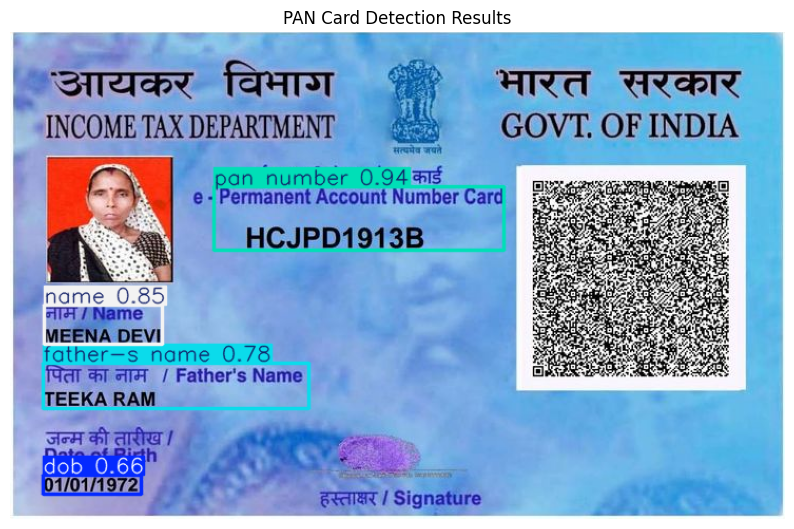

In [17]:
from ultralyticsplus import YOLO
import matplotlib.pyplot as plt
import cv2

# Load the PAN card detection model
model = YOLO('foduucom/pan-card-detection')

# Set parameters if needed
model.overrides['conf'] = 0.25
model.overrides['iou'] = 0.45

# Perform inference on an image
# Replace with the actual path to your PAN card image in Colab
image_path = r'/content/pan card eg (1).jpg' # Example path

if image_path and os.path.exists(image_path): # Add a check for image path existence
    image = cv2.imread(image_path)
    if image is not None: # Add a check for successful image loading
        results = model.predict(image_path)

        # Visualize results using matplotlib
        # results.show() # Removed as matplotlib is more reliable
        if results and results[0].boxes:
            result_image = results[0].plot() # Get image with detections plotted
            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title('PAN Card Detection Results')
            plt.show()
        else:
            print("No PAN card detected in the image.")
    else:
        print(f"Error loading image from {image_path}")
else:
    print(f"Image path not found or is invalid: {image_path}")


image 1/1 /content/pan card eg (1).jpg: 416x640 1 dob, 1 father-s name, 1 name, 1 pan number, 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 person, 31.4ms
Speed: 3.0ms preprocess, 31.4ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


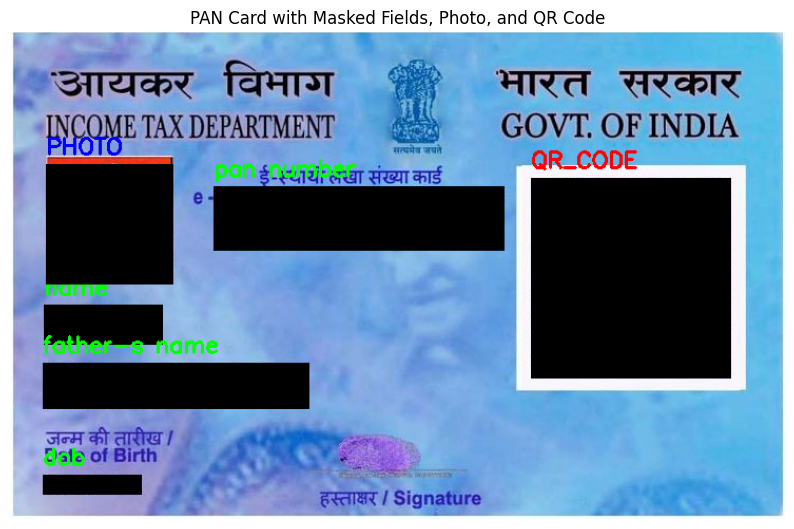

In [19]:
from ultralyticsplus import YOLO
import matplotlib.pyplot as plt
import cv2
import os
from qrdet import QRDetector  # pip install qrdet if not installed

# Load the PAN card detection model
model = YOLO('foduucom/pan-card-detection')
model.overrides['conf'] = 0.25
model.overrides['iou'] = 0.45

# Load a YOLOv8 COCO model for photo (person) detection
coco_model = YOLO('yolov8n.pt')  # Download if not present

# Initialize QR code detector
qr_detector = QRDetector(model_size='s')

# Path to your PAN card image in Colab
image_path = r'/content/pan card eg (1).jpg'

if image_path and os.path.exists(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        image_masked = image.copy()

        # Mask PAN card fields
        results = model.predict(image_path)
        if results and results[0].boxes:
            for box, cls_id in zip(results[0].boxes.xyxy, results[0].boxes.cls):
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)
                label = model.names[int(cls_id)]
                cv2.putText(image_masked, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Mask QR codes
        qr_detections = qr_detector.detect(image=image, is_bgr=True)
        for det in qr_detections:
            x1, y1, x2, y2 = map(int, det['bbox_xyxy'])
            cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)
            cv2.putText(image_masked, "QR_CODE", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Mask photo (person) region
        coco_results = coco_model.predict(image)
        if coco_results and coco_results[0].boxes:
            for box, cls_id in zip(coco_results[0].boxes.xyxy, coco_results[0].boxes.cls):
                if int(cls_id) == 0:  # class 0 is 'person'
                    x1, y1, x2, y2 = map(int, box)
                    cv2.rectangle(image_masked, (x1, y1), (x2, y2), (0, 0, 0), -1)
                    cv2.putText(image_masked, "PHOTO", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # Display masked image
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image_masked, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('PAN Card with Masked Fields, Photo, and QR Code')
        plt.show()
    else:
        print(f"Error loading image from {image_path}")
else:
    print(f"Image path not found or is invalid: {image_path}")


In [ ]:
# 11. (Optional) Save the masked image
cv2.imwrite('/content/drive/MyDrive/aadhar_project/aadhar_masked.jpg', image)